In [24]:
import torch

In [25]:
# 超參數
batch_n = 100
in_features = 3
out_feature = 1
epoch_n = 100
leaning_rate = 0.01 #越大收斂越快

In [26]:
x = torch.rand(batch_n, in_features) # 0～1的浮點數
coef = torch.Tensor([[3.],[5.],[1.]]) # 第二個最集中，結果為100x1的矩陣，
y = x.mm(coef) # 矩陣相乘
y = y.add(torch.rand(batch_n, out_feature)) # 加入雜訊
y

tensor([[3.3171],
        [3.0751],
        [3.8242],
        [7.8334],
        [7.0342],
        [3.5945],
        [2.2809],
        [5.8077],
        [6.6986],
        [1.5054],
        [6.3461],
        [2.7473],
        [2.8408],
        [5.9754],
        [5.6649],
        [2.8392],
        [2.2433],
        [5.2889],
        [5.7765],
        [8.2019],
        [7.5252],
        [5.9206],
        [4.3393],
        [5.1510],
        [5.3437],
        [5.6169],
        [6.7861],
        [4.7338],
        [3.0712],
        [6.6043],
        [2.9412],
        [3.2240],
        [3.3231],
        [2.0454],
        [6.5138],
        [1.5250],
        [4.5049],
        [3.6134],
        [3.1933],
        [6.0264],
        [3.6001],
        [4.8950],
        [3.8473],
        [5.0339],
        [4.1727],
        [5.0929],
        [3.9264],
        [4.8174],
        [6.0744],
        [3.2797],
        [5.9045],
        [6.9821],
        [3.3662],
        [4.7169],
        [2.8470],
        [1

In [27]:
import matplotlib.pyplot as plt

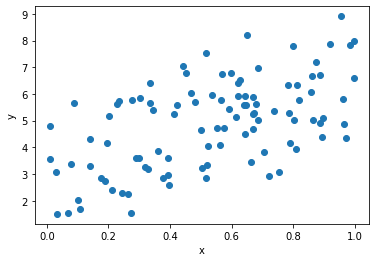

In [28]:
plt.figure()
plt.scatter(x[:,0],y) # 散布圖，取全部row
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [29]:
w = torch.rand(in_features, out_feature) # weight,學習讓w接近coef的3,5,1
w

tensor([[0.1275],
        [0.2582],
        [0.7285]])

# 土法煉鋼

MSE

1.   1/n Summation(y-hat - y)^2
2.   y-hat = w * x
3.   1/n Summation(wx - y)^2




In [30]:
for epoch in range(epoch_n):
  y_predict = x.mm(w) # y-hat
  loss = (y_predict - y).pow(2).mean()
  print("Epoch: {}, Loss: {:.4f}".format(epoch,loss))
  grad_y_pred = 2 * (y_predict - y)
  grad_w = x.t().mm(grad_y_pred)
  w -= leaning_rate * grad_w
w

Epoch: 0, Loss: 21.0711
Epoch: 1, Loss: 11.4451
Epoch: 2, Loss: 6.2702
Epoch: 3, Loss: 3.4802
Epoch: 4, Loss: 1.9698
Epoch: 5, Loss: 1.1477
Epoch: 6, Loss: 0.6967
Epoch: 7, Loss: 0.4469
Epoch: 8, Loss: 0.3065
Epoch: 9, Loss: 0.2264
Epoch: 10, Loss: 0.1796
Epoch: 11, Loss: 0.1516
Epoch: 12, Loss: 0.1344
Epoch: 13, Loss: 0.1234
Epoch: 14, Loss: 0.1163
Epoch: 15, Loss: 0.1115
Epoch: 16, Loss: 0.1081
Epoch: 17, Loss: 0.1058
Epoch: 18, Loss: 0.1041
Epoch: 19, Loss: 0.1028
Epoch: 20, Loss: 0.1019
Epoch: 21, Loss: 0.1012
Epoch: 22, Loss: 0.1007
Epoch: 23, Loss: 0.1004
Epoch: 24, Loss: 0.1001
Epoch: 25, Loss: 0.0998
Epoch: 26, Loss: 0.0997
Epoch: 27, Loss: 0.0996
Epoch: 28, Loss: 0.0995
Epoch: 29, Loss: 0.0994
Epoch: 30, Loss: 0.0993
Epoch: 31, Loss: 0.0993
Epoch: 32, Loss: 0.0993
Epoch: 33, Loss: 0.0992
Epoch: 34, Loss: 0.0992
Epoch: 35, Loss: 0.0992
Epoch: 36, Loss: 0.0992
Epoch: 37, Loss: 0.0992
Epoch: 38, Loss: 0.0992
Epoch: 39, Loss: 0.0992
Epoch: 40, Loss: 0.0992
Epoch: 41, Loss: 0.0992


tensor([[3.2145],
        [5.1359],
        [1.5014]])

1. (y-hat - y)^2 -> (f(w) - y)^2
2. g( (f(w) - y)^2 )
3. Chain Rule: g(f(w))/dw -> 2(y-hat - y)

##Auto Gradient

In [31]:
w = torch.rand(in_features, out_feature, requires_grad=True) # 重置資料

In [32]:
from torch.autograd import Variable

Vx = Variable(x, requires_grad = False)
Vy = Variable(y, requires_grad = False)
Vw = Variable(w, requires_grad = True)

In [33]:
for epoch in range(epoch_n):
  y_predict = Vx.mm(Vw) # y-hat
  loss = (y_predict - Vy).pow(2).mean()
  print("Epoch: {}, Loss: {:.4f}".format(epoch,loss))
  loss.backward() # 在所有和loss有關Tensor，會自動做運算
  Vw.data -= leaning_rate * Vw.grad.data # 因Call by reference所以同 w-=leaning_rate*Vw.grad.data
  Vw.grad.data.zero_()
Vw.data

Epoch: 0, Loss: 20.3573
Epoch: 1, Loss: 19.6859
Epoch: 2, Loss: 19.0375
Epoch: 3, Loss: 18.4113
Epoch: 4, Loss: 17.8065
Epoch: 5, Loss: 17.2223
Epoch: 6, Loss: 16.6582
Epoch: 7, Loss: 16.1134
Epoch: 8, Loss: 15.5872
Epoch: 9, Loss: 15.0790
Epoch: 10, Loss: 14.5881
Epoch: 11, Loss: 14.1141
Epoch: 12, Loss: 13.6562
Epoch: 13, Loss: 13.2141
Epoch: 14, Loss: 12.7870
Epoch: 15, Loss: 12.3745
Epoch: 16, Loss: 11.9761
Epoch: 17, Loss: 11.5913
Epoch: 18, Loss: 11.2197
Epoch: 19, Loss: 10.8608
Epoch: 20, Loss: 10.5141
Epoch: 21, Loss: 10.1792
Epoch: 22, Loss: 9.8558
Epoch: 23, Loss: 9.5435
Epoch: 24, Loss: 9.2418
Epoch: 25, Loss: 8.9503
Epoch: 26, Loss: 8.6689
Epoch: 27, Loss: 8.3970
Epoch: 28, Loss: 8.1344
Epoch: 29, Loss: 7.8807
Epoch: 30, Loss: 7.6357
Epoch: 31, Loss: 7.3991
Epoch: 32, Loss: 7.1705
Epoch: 33, Loss: 6.9497
Epoch: 34, Loss: 6.7364
Epoch: 35, Loss: 6.5304
Epoch: 36, Loss: 6.3314
Epoch: 37, Loss: 6.1392
Epoch: 38, Loss: 5.9535
Epoch: 39, Loss: 5.7741
Epoch: 40, Loss: 5.6008
Epoc

tensor([[2.8193],
        [2.3702],
        [2.8678]])

## nn.Module 

可自訂特殊Layer

In [34]:
import torch.nn as nn

In [35]:
# 繼承 nn.Module
class Model(nn.Module):
  # Constructor 建構子
  def __init__(self):
    super(Model, self).__init__() # 呼叫父類別的建構子

  def forward(self, x, w):
    y_pred = x.mm(w)

    return y_pred

  # backward 大多不寫
  def backward(self):
    pass

In [36]:
model = Model()
Vw = Variable(torch.rand(in_features, out_feature), requires_grad = True) # 會影響 param.data

In [37]:
for epoch in range(epoch_n):
  y_predict = model(Vx,Vw)
  loss = (y_predict - Vy).pow(2).mean()
  print("Epoch: {}, Loss: {:.4f}".format(epoch,loss))
  loss.backward() # 在所有和loss有關Tensor，會自動做運算
  Vw.data -= leaning_rate * Vw.grad.data # 因Call by reference所以同 w-=leaning_rate*Vw.grad.data
  Vw.grad.data.zero_()

Epoch: 0, Loss: 20.1709
Epoch: 1, Loss: 19.4981
Epoch: 2, Loss: 18.8484
Epoch: 3, Loss: 18.2208
Epoch: 4, Loss: 17.6148
Epoch: 5, Loss: 17.0296
Epoch: 6, Loss: 16.4643
Epoch: 7, Loss: 15.9185
Epoch: 8, Loss: 15.3913
Epoch: 9, Loss: 14.8822
Epoch: 10, Loss: 14.3905
Epoch: 11, Loss: 13.9156
Epoch: 12, Loss: 13.4570
Epoch: 13, Loss: 13.0141
Epoch: 14, Loss: 12.5863
Epoch: 15, Loss: 12.1732
Epoch: 16, Loss: 11.7742
Epoch: 17, Loss: 11.3889
Epoch: 18, Loss: 11.0168
Epoch: 19, Loss: 10.6573
Epoch: 20, Loss: 10.3102
Epoch: 21, Loss: 9.9750
Epoch: 22, Loss: 9.6512
Epoch: 23, Loss: 9.3385
Epoch: 24, Loss: 9.0364
Epoch: 25, Loss: 8.7448
Epoch: 26, Loss: 8.4630
Epoch: 27, Loss: 8.1909
Epoch: 28, Loss: 7.9281
Epoch: 29, Loss: 7.6743
Epoch: 30, Loss: 7.4292
Epoch: 31, Loss: 7.1924
Epoch: 32, Loss: 6.9637
Epoch: 33, Loss: 6.7428
Epoch: 34, Loss: 6.5295
Epoch: 35, Loss: 6.3234
Epoch: 36, Loss: 6.1244
Epoch: 37, Loss: 5.9322
Epoch: 38, Loss: 5.7465
Epoch: 39, Loss: 5.5672
Epoch: 40, Loss: 5.3940
Epoch

In [38]:
Vw.data

tensor([[3.2135],
        [2.6368],
        [2.2506]])

## Loss Function

In [39]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__() # 呼叫父類別的建構子
    self.linear = nn.Linear(in_features, out_feature, False) # 沒有常數項 False

  def forward(self, x):
    y_pred = self.linear(x)

    return y_pred

  # backward 大多不寫
  def backward(self):
    pass

In [40]:
model = Model()
loss_func = nn.MSELoss()
print(model)

Model(
  (linear): Linear(in_features=3, out_features=1, bias=False)
)


In [41]:
for epoch in range(epoch_n * 10): # epoch 10倍
  y_predict = model(Vx)
  loss = loss_func(y_predict, y) # y_predict,y的順序要注意
  print("Epoch: {}, Loss: {:.4f}".format(epoch,loss))
  model.zero_grad() # 會產生隨機 Entropy ，所以要搶先清除?
  loss.backward() # 在所有和loss有關Tensor，會自動做運算
  for param in model.parameters(): # 從各個 Layer 取
    param.data -= leaning_rate * param.grad.data

Epoch: 0, Loss: 25.1659
Epoch: 1, Loss: 24.3216
Epoch: 2, Loss: 23.5062
Epoch: 3, Loss: 22.7187
Epoch: 4, Loss: 21.9583
Epoch: 5, Loss: 21.2239
Epoch: 6, Loss: 20.5146
Epoch: 7, Loss: 19.8296
Epoch: 8, Loss: 19.1681
Epoch: 9, Loss: 18.5293
Epoch: 10, Loss: 17.9124
Epoch: 11, Loss: 17.3165
Epoch: 12, Loss: 16.7411
Epoch: 13, Loss: 16.1854
Epoch: 14, Loss: 15.6487
Epoch: 15, Loss: 15.1304
Epoch: 16, Loss: 14.6298
Epoch: 17, Loss: 14.1464
Epoch: 18, Loss: 13.6795
Epoch: 19, Loss: 13.2286
Epoch: 20, Loss: 12.7932
Epoch: 21, Loss: 12.3726
Epoch: 22, Loss: 11.9664
Epoch: 23, Loss: 11.5742
Epoch: 24, Loss: 11.1953
Epoch: 25, Loss: 10.8294
Epoch: 26, Loss: 10.4761
Epoch: 27, Loss: 10.1348
Epoch: 28, Loss: 9.8052
Epoch: 29, Loss: 9.4868
Epoch: 30, Loss: 9.1794
Epoch: 31, Loss: 8.8824
Epoch: 32, Loss: 8.5956
Epoch: 33, Loss: 8.3187
Epoch: 34, Loss: 8.0511
Epoch: 35, Loss: 7.7928
Epoch: 36, Loss: 7.5432
Epoch: 37, Loss: 7.3022
Epoch: 38, Loss: 7.0694
Epoch: 39, Loss: 6.8446
Epoch: 40, Loss: 6.627

In [42]:
for param in model.parameters():
    print(param.data) # 很接近 3,5,1

tensor([[3.3360, 4.4918, 1.9250]])


In [43]:
import torch.optim as opt

In [44]:
model = Model()
loss_func = nn.MSELoss()
optimizer = opt.SGD(model.parameters(), lr=leaning_rate) # 接近上面最基礎的 Gradient Desent

In [45]:
for epoch in range(epoch_n * 10): # epoch 10倍
  y_predict = model(Vx)
  loss = loss_func(y_predict, y) # y_predict,y的順序要注意
  print("Epoch: {}, Loss: {:.4f}".format(epoch,loss))
  model.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0, Loss: 32.7080
Epoch: 1, Loss: 31.6028
Epoch: 2, Loss: 30.5356
Epoch: 3, Loss: 29.5049
Epoch: 4, Loss: 28.5095
Epoch: 5, Loss: 27.5483
Epoch: 6, Loss: 26.6200
Epoch: 7, Loss: 25.7236
Epoch: 8, Loss: 24.8578
Epoch: 9, Loss: 24.0217
Epoch: 10, Loss: 23.2143
Epoch: 11, Loss: 22.4346
Epoch: 12, Loss: 21.6815
Epoch: 13, Loss: 20.9543
Epoch: 14, Loss: 20.2520
Epoch: 15, Loss: 19.5738
Epoch: 16, Loss: 18.9188
Epoch: 17, Loss: 18.2862
Epoch: 18, Loss: 17.6753
Epoch: 19, Loss: 17.0854
Epoch: 20, Loss: 16.5156
Epoch: 21, Loss: 15.9654
Epoch: 22, Loss: 15.4340
Epoch: 23, Loss: 14.9208
Epoch: 24, Loss: 14.4251
Epoch: 25, Loss: 13.9465
Epoch: 26, Loss: 13.4842
Epoch: 27, Loss: 13.0378
Epoch: 28, Loss: 12.6067
Epoch: 29, Loss: 12.1903
Epoch: 30, Loss: 11.7882
Epoch: 31, Loss: 11.3998
Epoch: 32, Loss: 11.0247
Epoch: 33, Loss: 10.6625
Epoch: 34, Loss: 10.3127
Epoch: 35, Loss: 9.9748
Epoch: 36, Loss: 9.6485
Epoch: 37, Loss: 9.3333
Epoch: 38, Loss: 9.0290
Epoch: 39, Loss: 8.7350
Epoch: 40, Loss

In [46]:
for param in model.parameters():
  print(param.data)

tensor([[3.2174, 4.5916, 1.9581]])
